# LAB: (quasi-) Newton methods

Author : Alexandre Gramfort

The objective of this lab session is to implement:
- Newton method
- DFP
- BFGS
and compare your implementation with the BFGS and L-BFGS solvers in scipy

You will need to knowledge on **line search methods** and **conjugate gradient** in particular you should reuse the notebooks presented during the lectures.

## VERY IMPORTANT

- This work **must be done by pairs of students**.
- **Each** student must send their work **before the 30th of october at 23:59**, using the **moodle platform**.
- This means that **each student in the pair sends the same file**
- On the moodle, in the "Optimization for Data Science" course, you have a "devoir" section called **Rendu TP du 24 octobre 2016**. This is where you submit your jupyter notebook file. 
- The **name of the file must be** constructed as in the next cell

# Gentle reminder: no evaluation if you don't respect this EXACTLY

### How to construct the name of your file

In [1]:
# Change here using YOUR first and last names
fn1 = "côme"
ln1 = "arvis"
fn2 = "guillaume"
ln2 = "ligner"

filename = "_".join(map(lambda s: s.strip().lower(), 
                        ["tp_newton", ln1, fn1, "and", ln2, fn2])) + ".ipynb"
print(filename)

tp_newton_arvis_côme_and_ligner_guillaume.ipynb


# Part 0: Demo using Gradient descent

First import the necessary libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

%matplotlib inline

Now import the necessary function from the optim_utils.py file.

In [3]:
from optim_utils import test_solver

You'll have work only with the `test_solver` function.

This function expects a function as parameter.

The signature of the function `optimizer` to pass should be the following:

`optimizer(x0, f, f_grad, f_hessian)`

Let us now make an example with a gradient descent.

In [4]:
def gradient_descent(x0, f, f_grad, f_hessian=None):

    default_step = 0.01
    c1 = 0.0001
    c2 = 0.9
    max_iter = 100
    
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = True

    all_x_k, all_f_k = list(), list()
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    for k in range(1, max_iter + 1):

        grad_x = f_grad(x)

        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              -grad_x, grad_x,
                                                              c1=c1, c2=c2)
        print("step = %.6g" % step)
        
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step

        x -= step * grad_x

        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad < 1e-6:
            break

    return np.array(all_x_k), np.array(all_f_k)

Now I can call the `test_solver` function with this solver:


Running solver on case 1
step = 1
iter: 1, f: 0.187228, l_inf_norm(grad): 0.35904
step = 1
iter: 2, f: 0.0522931, l_inf_norm(grad): 0.162853
step = 1
iter: 3, f: 0.020076, l_inf_norm(grad): 0.110187
step = 1
iter: 4, f: 0.00874399, l_inf_norm(grad): 0.0745522
step = 1
iter: 5, f: 0.00395127, l_inf_norm(grad): 0.050442
step = 1
iter: 6, f: 0.00180287, l_inf_norm(grad): 0.0341291
step = 1
iter: 7, f: 0.000824643, l_inf_norm(grad): 0.0230917
step = 1
iter: 8, f: 0.000377432, l_inf_norm(grad): 0.0156239
step = 1
iter: 9, f: 0.000172774, l_inf_norm(grad): 0.0105711
step = 1
iter: 10, f: 7.90929e-05, l_inf_norm(grad): 0.00715241
step = 1
iter: 11, f: 3.62076e-05, l_inf_norm(grad): 0.00483932
step = 1
iter: 12, f: 1.65754e-05, l_inf_norm(grad): 0.00327429
step = 1
iter: 13, f: 7.588e-06, l_inf_norm(grad): 0.00221538
step = 1
iter: 14, f: 3.47369e-06, l_inf_norm(grad): 0.00149893
step = 1
iter: 15, f: 1.59021e-06, l_inf_norm(grad): 0.00101417
step = 1
iter: 16, f: 7.2798e-07, l_inf_norm(grad)

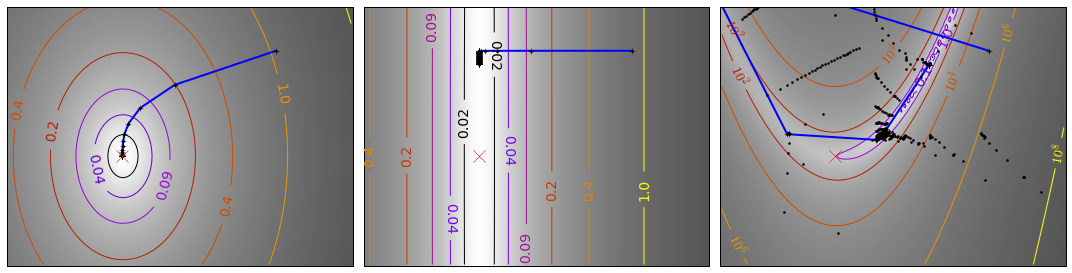

In [5]:
test_solver(gradient_descent)

# Part 2: Implement Newton method

You now need to implement Newton method using either `linalg.solve` or `sparse.linalg.cg` solve the linear system at each iteration. You need to implement both versions.

You're expected to comment in a few lines what you see.

In [6]:
import scipy.linalg as linalg

def newton(x0, f, f_grad, f_hessian):
    default_step = 0.01
    c1 = 0.0001
    c2 = 0.9
    max_iter = 100
    
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = True

    all_x_k, all_f_k = list(), list()
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    for k in range(1, max_iter + 1):

        grad_x = f_grad(x)
        
        ####################################
        # Compute here the search direction
        # d = ...
        d = linalg.solve(f_hessian(x), -f_grad(x))
        ####################################

        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              d, grad_x,
                                                              c1=c1, c2=c2)
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step

        ##################################
        # Compute here the new value of x
        # x = ...
        x += step * d
        ##################################

        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad < 1e-6:
            break

    return np.array(all_x_k), np.array(all_f_k)


Running solver on case 1
iter: 1, f: 0, l_inf_norm(grad): 0

Running solver on case 2
iter: 1, f: 0, l_inf_norm(grad): 0

Running solver on case 3
iter: 1, f: 0.357547, l_inf_norm(grad): 1.19858
iter: 2, f: 0.253454, l_inf_norm(grad): 14.6168
iter: 3, f: 0.137976, l_inf_norm(grad): 3.9843
iter: 4, f: 0.088137, l_inf_norm(grad): 6.14586
iter: 5, f: 0.0414804, l_inf_norm(grad): 3.93321
iter: 6, f: 0.0162138, l_inf_norm(grad): 2.7976
iter: 7, f: 0.00446914, l_inf_norm(grad): 1.29953
iter: 8, f: 0.000705202, l_inf_norm(grad): 0.668389
iter: 9, f: 3.34966e-05, l_inf_norm(grad): 0.121298
iter: 10, f: 1.24866e-07, l_inf_norm(grad): 0.00982241
iter: 11, f: 2.01025e-12, l_inf_norm(grad): 3.05844e-05
iter: 12, f: 5.2958e-22, l_inf_norm(grad): 6.41073e-10


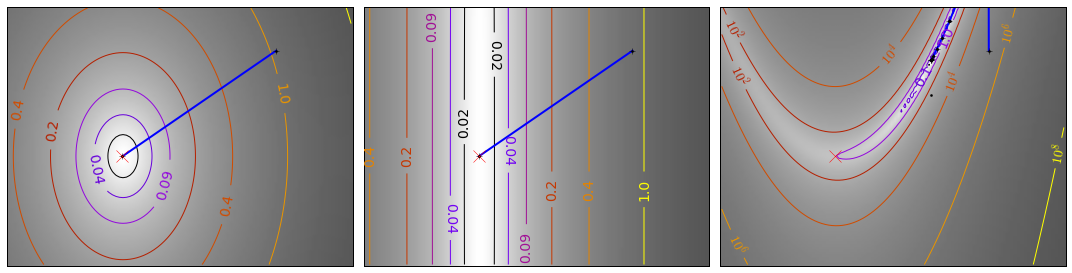

In [7]:
test_solver(newton)

#### Your comments here

**Comments on the implemented Newton method :**
As expected from the newton method, no matter how the quadratic function is parametrized, the Newton method reaches the minimum within one iteration. It also performs much better than gradient descent in case of the super-ill conditioned problem : the Rosenbrock function. The Rosenbrock function is not quadratic and it is interesting to notice how the convergence first seems very slow and suddenly shoots up as xk enters the closed ball B centered on xmin. From the 9the iteration the norm of the gradient decreases from around 10^-1 to 10^-2 and 10^-5 after that. This is due to the quadratic convergence that exists locally around xmin. 

# Part 2: Implement DFP algorithm

You now need to implement the DFP algorithm.

In [8]:
def dfp(x0, f, f_grad, f_hessian):
    default_step = 0.01
    c1 = 0.0001
    c2 = 0.95
    max_iter = 200
    print(x0)
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = True

    all_x_k, all_f_k = list(), list()
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    B = np.eye(len(x))  # inverse Hessian approximation
    
    print(np.shape(B))
    
    grad_x = f_grad(x)
    
    for k in range(1, max_iter + 1): 
        
        ####################################
        # Compute here the search direction
        # d = ...
        d = -B.dot(f_grad(x))
        ####################################
        
        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              d, grad_x,
                                                              c1=c1, c2=c2)
        
        
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step

        ##################################
        # Compute here the new value of x
        # x = ...
        x_new = x + step * d
        ##################################
        
        s = step * d
        y = f_grad(x_new) - f_grad(x)
        
        #########################################################
        # Update the inverse Hessian approximation
        # B = ...
        s = s[:, None]
        y = y[:, None]
        B_new = B + ((s.dot(s.T)) / (s.T.dot(y)))
        B_new -= (B.dot(y).dot(y.T).dot(B)) / (y.T.dot(B).dot(y))
        B = B_new
        #########################################################
        x = x_new
        
        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad < 1e-6:
            break
            
        grad_x = new_grad

    return np.array(all_x_k), np.array(all_f_k)


Running solver on case 1
[ 1.6  1.1]
(2, 2)
iter: 1, f: 0.187228, l_inf_norm(grad): 0.35904
iter: 2, f: 0.0214911, l_inf_norm(grad): 0.114753
iter: 3, f: 0.00899657, l_inf_norm(grad): 0.069501
iter: 4, f: 0.00023476, l_inf_norm(grad): 0.0175216
iter: 5, f: 1.76801e-05, l_inf_norm(grad): 0.00465113
iter: 6, f: 3.20353e-08, l_inf_norm(grad): 0.000140183
iter: 7, f: 1.32183e-10, l_inf_norm(grad): 8.99094e-06
iter: 8, f: 8.82459e-15, l_inf_norm(grad): 1.04309e-07

Running solver on case 2
[ 1.6  1.1]
(2, 2)
iter: 1, f: 0.0978185, l_inf_norm(grad): 0.35904
iter: 2, f: 0.000159508, l_inf_norm(grad): 0.000290207
iter: 3, f: 0.000138677, l_inf_norm(grad): 0.000270594
iter: 4, f: 1.92681e-07, l_inf_norm(grad): 0.000503909
iter: 5, f: 1.4273e-07, l_inf_norm(grad): 0.000433799
iter: 6, f: 3.512e-14, l_inf_norm(grad): 1.6706e-08

Running solver on case 3
[ 1.6  1.1]
(2, 2)
iter: 1, f: 104.123, l_inf_norm(grad): 700.972
iter: 2, f: 7.56575, l_inf_norm(grad): 24.138
iter: 3, f: 7.34339, l_inf_norm(

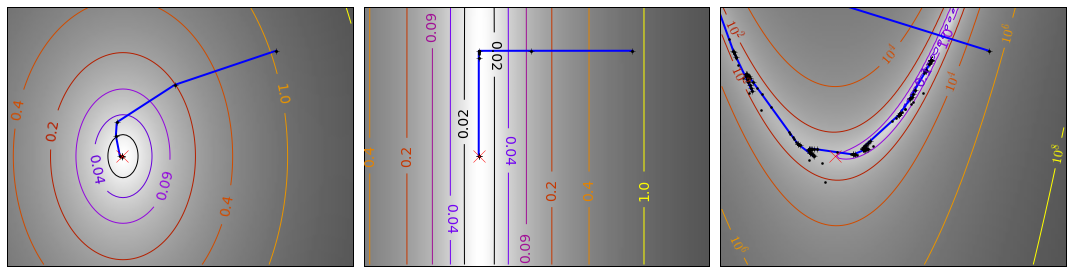

In [9]:
test_solver(dfp)

#### Your comments here

**Comments on the implemented DFP algorithm :**
In the first 2 "pseudo quadratic cases" our algorithm converges in 8 and 6 iterations. Theoretically in the quadratic case the algorithm behaves like the conjugate gradient descent and should converge in at most n = 2 iterations. The reason for the difference here is that we use function that are almost quadratic only. 
Therefore, strictly speaking the 3 cases are general (non quadratic) cases. We can see how the algorithm behaves like the Newton method in the general case as the convergence rate becomes incredibly stronger as x_k enters the closed ball B centered on xmin. For instance, in the third case the norm of the gradient goes from 10^-6 to 10^-8 within 1 iteration --> quadratic convergence. 


# Part 3: Implement BFGS algorithm

You now need to implement the BFGS algorithm.

In [10]:
def bfgs(x0, f, f_grad, f_hessian):
    default_step = 0.01
    c1 = 0.0001
    c2 = 0.9
    max_iter = 100
    
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = True

    all_x_k, all_f_k = list(), list()
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    H = np.eye(len(x))  # Hessian approximation
    
    grad_x = f_grad(x)
    
    for k in range(1, max_iter + 1):       
        
        ####################################
        # Compute here the search direction
        # d = ...
        d = linalg.solve(H, -f_grad(x))
        ####################################

        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              d, grad_x,
                                                              c1=c1, c2=c2)
                
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step

        ##################################
        # Compute here the new value of x
        # x = ...
        x_new = x + step * d
        ##################################
        
        s = step * d
        y = f_grad(x_new) - f_grad(x)
        
        #########################################################
        # Update the inverse Hessian approximation
        # H = ...
        s = s[:, None]
        y = y[:, None]
        H_new = H + ((y.dot(y.T)) / (y.T.dot(s)))
        H_new -= (H.dot(s).dot(s.T).dot(H)) / (s.T.dot(H).dot(s))
        H = H_new
        #########################################################
        x = x_new
        
        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad < 1e-6:
            break
            
        grad_x = new_grad

    return np.array(all_x_k), np.array(all_f_k)


Running solver on case 1
iter: 1, f: 0.187228, l_inf_norm(grad): 0.35904
iter: 2, f: 0.0209281, l_inf_norm(grad): 0.11324
iter: 3, f: 0.00806831, l_inf_norm(grad): 0.0656686
iter: 4, f: 3.9809e-05, l_inf_norm(grad): 0.00723054
iter: 5, f: 4.69973e-07, l_inf_norm(grad): 0.000735419
iter: 6, f: 7.22702e-11, l_inf_norm(grad): 6.78586e-06
iter: 7, f: 2.47614e-14, l_inf_norm(grad): 1.18656e-07

Running solver on case 2
iter: 1, f: 0.0978185, l_inf_norm(grad): 0.35904
iter: 2, f: 0.000159508, l_inf_norm(grad): 0.000290207
iter: 3, f: 0.000119306, l_inf_norm(grad): 0.00025098
iter: 4, f: 6.91982e-13, l_inf_norm(grad): 9.54949e-07

Running solver on case 3
iter: 1, f: 104.123, l_inf_norm(grad): 700.972
iter: 2, f: 7.59071, l_inf_norm(grad): 26.034
iter: 3, f: 7.34411, l_inf_norm(grad): 4.87129
iter: 4, f: 7.29555, l_inf_norm(grad): 8.30631
iter: 5, f: 6.98403, l_inf_norm(grad): 49.3631
iter: 6, f: 6.72314, l_inf_norm(grad): 26.9831
iter: 7, f: 6.31556, l_inf_norm(grad): 14.5499
iter: 8, f: 5.

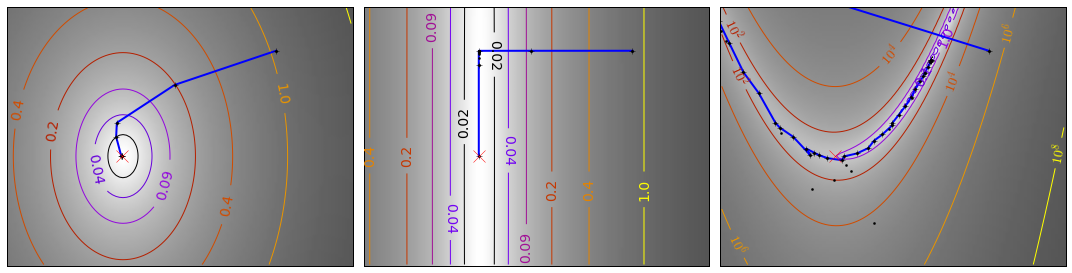

In [11]:
test_solver(bfgs)

#### Your comments here

**Comments on the implemented BGFS algorithm :**

This algorithm, as we can see, has the same properties as the DFP algorithm. This can be easily explained by the fact that BGFS is merely derived from the DFP algorithm by swapping the roles of sk and yk. Just like DFP we notice in the first 2 cases that BGFS does not converge in n = 2 iterations, and that is due to the function not being exatcly quadratic. Also we see a quadratic convergence towards the end of the algorithm, meaning that xk has enterd the closed ball centered on xmin and the algorithm then converges quadratically to xmin.


# Part 4: Do the same now with scipy implementation of BFGS and L-BFGS


Running solver on case 1
iter: 0, f: 1.04046
iter: 1, f: 0.187228
iter: 2, f: 0.0209281
iter: 3, f: 0.00806831
iter: 4, f: 3.9809e-05
iter: 5, f: 4.69973e-07
iter: 6, f: 7.22702e-11

Running solver on case 2
iter: 0, f: 0.84496
iter: 1, f: 0.0978185
iter: 2, f: 0.000159508
iter: 3, f: 0.000119306
iter: 4, f: 5.19175e-05
iter: 5, f: 1.82899e-18

Running solver on case 3
iter: 0, f: 213.52
iter: 1, f: 4.01306
iter: 2, f: 0.145634
iter: 3, f: 0.0861765
iter: 4, f: 0.0191238
iter: 5, f: 0.0176516
iter: 6, f: 0.0174048
iter: 7, f: 0.0169351
iter: 8, f: 0.0131033
iter: 9, f: 0.000594684
iter: 10, f: 0.000120108
iter: 11, f: 9.42801e-05
iter: 12, f: 7.36943e-05
iter: 13, f: 3.86873e-05
iter: 14, f: 6.82427e-07
iter: 15, f: 1.10968e-08
iter: 16, f: 2.31353e-10
iter: 17, f: 3.31575e-12
iter: 18, f: 4.70551e-15


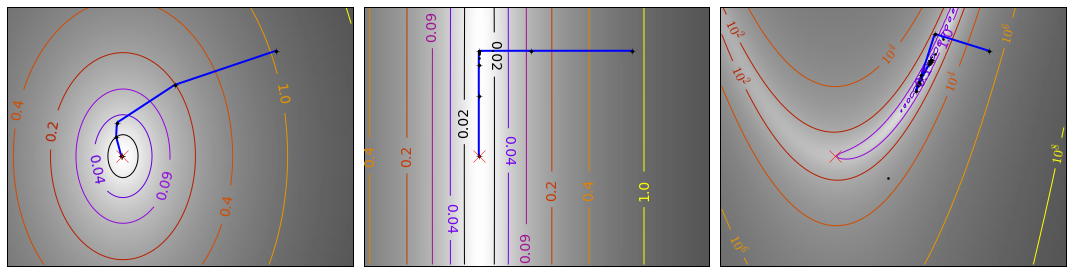

In [12]:
import scipy.optimize as scopti
from scipy.optimize import fmin_bfgs, fmin_l_bfgs_b

def bfgs_perso(x0, f, f_grad, f_hessian):
    _, all_x_k = fmin_bfgs(f, x0, f_grad, retall = True, disp = False)
    
    k = 0
    all_f_k = list()
    for x_iter in all_x_k:
        all_f_k.append(f(x_iter))
        print('iter: %d, f: %.6g' % (k, f(x_iter)))
        k = k+1
    
    return np.array(all_x_k), np.array(all_f_k)

test_solver(bfgs_perso)

**Comments on the scipy implemented BGFS algorithm :**

We notice that in the quadratic case, the scipy implemented algorithm finds the minimum within more or less as many iterations as our algorithm. However, when the problem becomes more complex, the scipy implemented algorithm does a better job at finding the minimum within fewer iterations. This may be due to the fact that this algorithm is coupled with a line search algorithm. We can suppose that the line search algorithm gets more important as the complecity of the problem grows. The scipy implemented function may use another line search algorithm than the one we used. 


Running solver on case 1
iter: 0, f: 0.238994
iter: 1, f: 0.0105981
iter: 2, f: 0.00149621
iter: 3, f: 1.22481e-08
iter: 4, f: 3.43032e-12

Running solver on case 2
iter: 0, f: 0.140506
iter: 1, f: 0.000566485
iter: 2, f: 0.00033544
iter: 3, f: 1.21688e-08
iter: 4, f: 2.65657e-12
iter: 5, f: 0.11896
iter: 6, f: 0.000159465
iter: 7, f: 0.000118933
iter: 8, f: 2.28137e-13

Running solver on case 3
iter: 0, f: 12.7391
iter: 1, f: 7.20885
iter: 2, f: 1.76605
iter: 3, f: 0.999616
iter: 4, f: 0.999994
iter: 5, f: 54.8793
iter: 6, f: 121.807
iter: 7, f: 91.0983
iter: 8, f: 1
iter: 9, f: 96.4346
iter: 10, f: 30.6424
iter: 11, f: 0.292533
iter: 12, f: 0.0595606
iter: 13, f: 0.0088037
iter: 14, f: 0.00875672
iter: 15, f: 0.00873231
iter: 16, f: 0.00864684
iter: 17, f: 0.0083231
iter: 18, f: 0.00767331
iter: 19, f: 0.00643001
iter: 20, f: 0.00474425
iter: 21, f: 0.00222424
iter: 22, f: 0.000372912
iter: 23, f: 4.50218e-05
iter: 24, f: 1.27017e-06
iter: 25, f: 2.02671e-08
iter: 26, f: 3.06881e-09

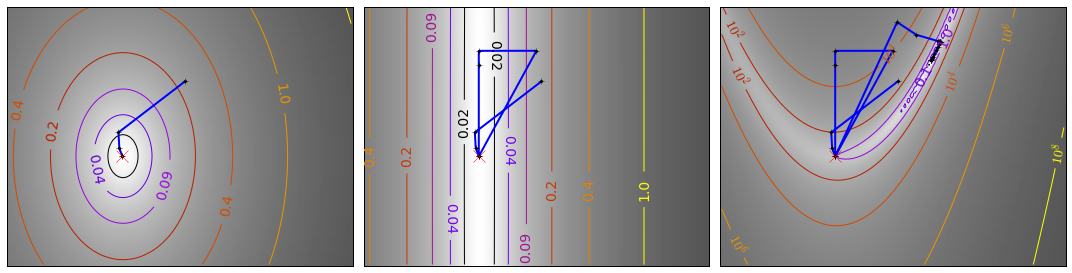

In [13]:
all_x_k2 = list()

def trace(vec):
    temp = vec.copy()
    all_x_k2.append(temp)

def l_bfgs_b_perso(x0, f, f_grad, f_hessian):
    result = fmin_l_bfgs_b(f, x0, f_grad, callback = trace)
        
    k = 0    
    all_f_k2 = list()
    for x_iter in all_x_k2:
        all_f_k2.append(f(x_iter))
        print('iter: %d, f: %.6g' % (k, f(x_iter)))
        k = k+1
    
    return np.array(all_x_k2), np.array(all_f_k2)

test_solver(l_bfgs_b_perso)

#### Your comments here

**Comments on the scipy implemented L-BGFS algorithm :**

We get similar results to those we got from the scipy BGFS algorithm. That is logical as L-BGFS is merely a variant of BGFS. 
L-BGFS allows to save memory by storing only a few vectors to compute the approximation of the hessian matrix. Therefore it is particularly useful in field like machine learning and computer vision where the size of the Hessian nxn can be millions. 